In [1]:
# all the necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# FAOSTAT are are split into multiple groups, FAOSTAT_countries consists from names of the countries
# and FAOSTAT_country_groups consists from bigger areas, such as (Europe, Americas, East Europe etc.)
FAOSTAT_country_data = pd.read_csv("data/faostat/FAOSTAT_countries.csv", engine='python')
FAOSTAT_country_groups = FAOSTAT_country_data["Country Group"].unique()
FAOSTAT_countries = FAOSTAT_country_data["Country"].unique()
CONTINENTS = ['Africa', 'Asia', 'Australia and New Zealand', 'Europe', 'Northern America', 'South America']

----
### Inputs_LandUse_E_All_Data_cleared.csv
+ **Unit**: ['1000 ha', 'million tonnes']
+ **Item**: ['Country area', 'Land area', 'Agriculture', ..., 'Forestry', 'Forest land', 'Primary Forest', ..., 'Farm buildings & farmyards', 'Perm. meadows & pastures area certified organic', ...]
+ **Element**: ['Area', 'Carbon stock in living biomass']

In [3]:
# select tree areas from Inputs_LandUse 
LAND_USE_FOREST_ITEMS = ['Forestry', 'Forest land', 'Primary Forest','Other naturally regenerated forest', 'Planted Forest']

land_use_all = pd.read_csv("data/faostat/Inputs_LandUse_E_All_Data_cleared.csv", engine='python')
land_use = land_use_all[land_use_all.Item.isin(LAND_USE_FOREST_ITEMS) &
                        land_use_all.Element.str.match('Area')]


In [4]:
land_use_all.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W


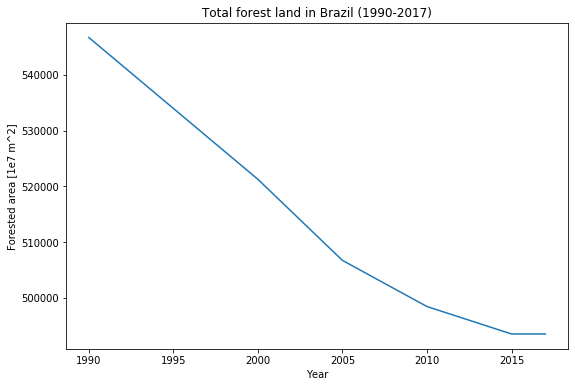

In [5]:
# total foreseted area (ha) for every contry per year
total_forested_area_yearly = land_use[land_use.Area.isin(FAOSTAT_countries) & 
                                      land_use.Item.str.match('Forestry')]

# plot forested area in COUNTRY over years
COUNTRY = 'Brazil'
country_forested_area_yearly = total_forested_area_yearly.loc[total_forested_area_yearly['Area'] == COUNTRY]

plt.figure(figsize=(9, 6))
plt.plot(country_forested_area_yearly['Year'], country_forested_area_yearly['Value'])
plt.title('Total forest land in ' + COUNTRY + ' (1990-2017)')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

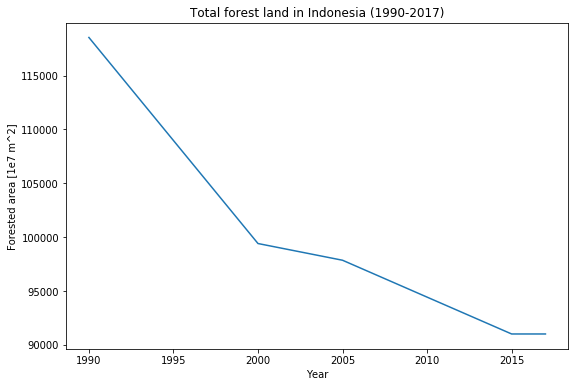

In [153]:
# plot forested area in COUNTRY over years
COUNTRY = 'Indonesia'
country_forested_area_yearly = total_forested_area_yearly.loc[total_forested_area_yearly['Area'] == COUNTRY]

plt.figure(figsize=(9, 6))
plt.plot(country_forested_area_yearly['Year'], country_forested_area_yearly['Value'])
plt.title('Total forest land in ' + COUNTRY + ' (1990-2017)')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

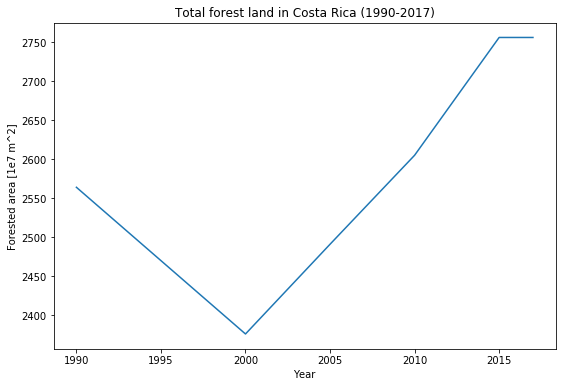

In [157]:
# plot forested area in COUNTRY over years
COUNTRY = 'Costa Rica'
country_forested_area_yearly = total_forested_area_yearly.loc[total_forested_area_yearly['Area'] == COUNTRY]

plt.figure(figsize=(9, 6))
plt.plot(country_forested_area_yearly['Year'], country_forested_area_yearly['Value'])
plt.title('Total forest land in ' + COUNTRY + ' (1990-2017)')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

+ **Indonesia** stopped deforestation in 2016 thanks to national peat drainage moratorium.
   See https://www.wri.org/blog/2018/08/indonesias-deforestation-dropped-60-percent-2017-theres-more-do


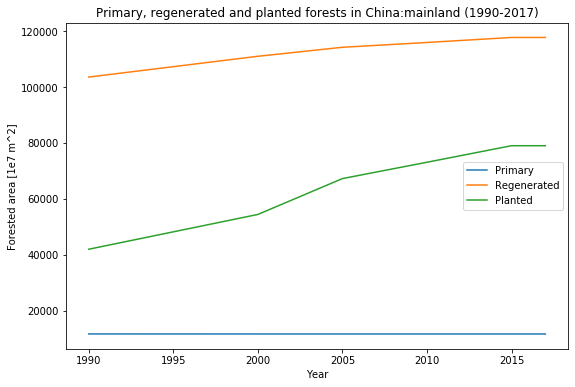

In [553]:
# plot the three kinds of forest (primary, regenerated and planted) for the selected country
COUNTRY = 'China:mainland'# 'United States of America'
LAND_USE_PARTIAL_FOREST_ITEMS = ['Primary Forest', 'Other naturally regenerated forest', 'Planted Forest']

country_partial_forested_area = land_use.loc[(land_use_all['Item'].isin(LAND_USE_PARTIAL_FOREST_ITEMS)) &
                                             (land_use_all['Area'] == COUNTRY)]

plt.figure(figsize=(9, 6))
for forest_type in LAND_USE_PARTIAL_FOREST_ITEMS:
    plt.plot(country_partial_forested_area.loc[country_partial_forested_area['Item'] == forest_type]['Year'],
             country_partial_forested_area.loc[country_partial_forested_area['Item'] == forest_type]['Value'])
plt.title('Primary, regenerated and planted forests in ' + COUNTRY + ' (1990-2017)')
plt.legend(['Primary', 'Regenerated', 'Planted'])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
# plt.savefig(COUNTRY + '_primary_regenerated_planted_forests')
plt.show()

In [483]:
# top 10 deforested countries (criterion: surface of forest losses)
all_countries_forests_area_1990 = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                               land_use_all.Element.str.match('Area') &
                                               (land_use_all.Year == 1990)]

all_countries_forests_area_2017 = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                               land_use_all.Element.str.match('Area') &
                                               (land_use_all.Year == 2017)]

# drop aggregated rows
all_countries_forests_area_1990 = all_countries_forests_area_1990[all_countries_forests_area_1990['Area Code'] < 5000]
all_countries_forests_area_2017 = all_countries_forests_area_2017[all_countries_forests_area_2017['Area Code'] < 5000]

# join dataframes
deforestation_1990_2017 = all_countries_forests_area_1990.merge(all_countries_forests_area_2017, 
                                                                left_on=['Area Code', 'Area'], 
                                                                right_on=['Area Code', 'Area'])

# TODO: check non joint countries because of different names

# compute deforested areas
deforestation_1990_2017.loc[:, 'Forest land differential'] = deforestation_1990_2017['Value_y'] - deforestation_1990_2017['Value_x']
deforestation_1990_2017 = deforestation_1990_2017.loc[:, ['Area', 'Forest land differential']]\
                                                 .sort_values(by=['Forest land differential'], 
                                                              ascending=False)
# TODO: drop China:mainland

# extract name of top 10 countries for de- and re-forestation
top_10_reforested_countries = deforestation_1990_2017.head(10).Area
top_10_deforested_countries = deforestation_1990_2017.tail(10).sort_values(by=['Forest land differential']).Area

# get time series for those countries
top_10_deforested_countries_yearly = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                                  land_use_all.Element.str.match('Area') &
                                                  land_use_all.Area.isin(top_10_deforested_countries)]
top_10_reforested_countries_yearly = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                                  land_use_all.Element.str.match('Area') &
                                                  land_use_all.Area.isin(top_10_reforested_countries)]

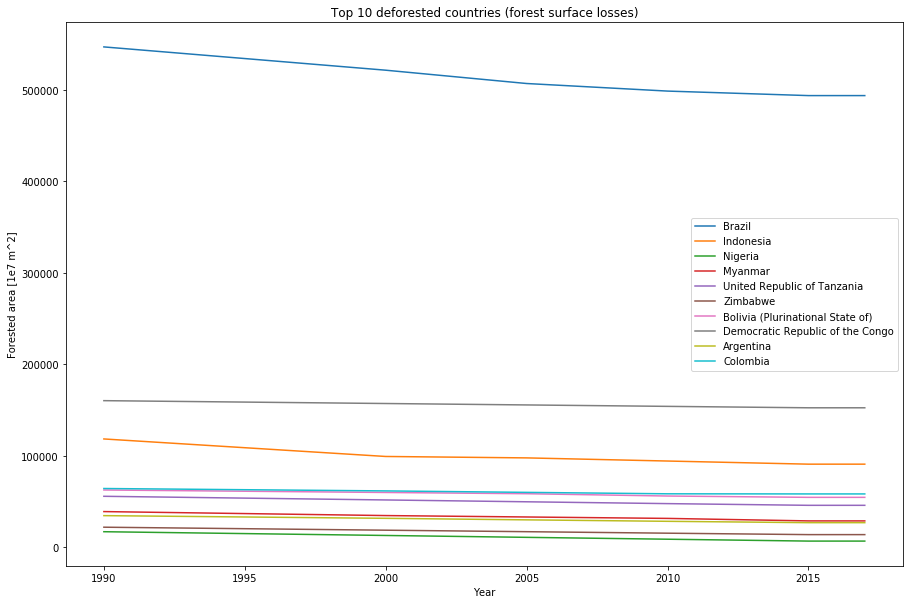

In [308]:
# top 10 deforested
plt.figure(figsize=(15, 10))
for country in top_10_deforested_countries:
    plt.plot(top_10_deforested_countries_yearly[top_10_deforested_countries_yearly['Area'] == country]['Year'],
             top_10_deforested_countries_yearly[top_10_deforested_countries_yearly['Area'] == country]['Value'])
plt.title('Top 10 deforested countries (forest surface losses)')
plt.legend(top_10_deforested_countries, loc='best')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

**(Taking the difference between 2014 and 2017 (instead of 1990 and 2017) the top 10 is almost the same)**

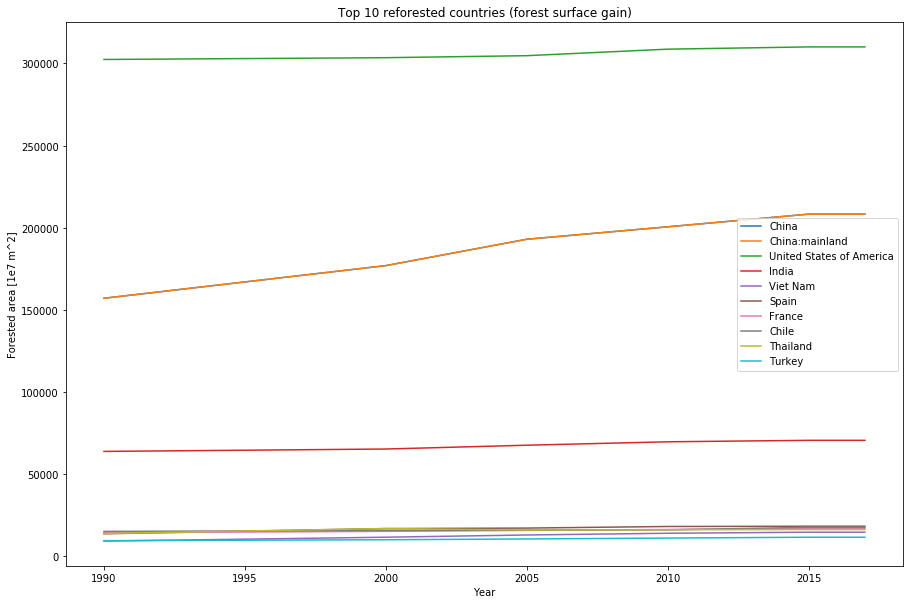

In [309]:
# top 10 reforested
plt.figure(figsize=(15, 10))
for country in top_10_reforested_countries:
    plt.plot(top_10_reforested_countries_yearly[top_10_reforested_countries_yearly['Area'] == country]['Year'],
             top_10_reforested_countries_yearly[top_10_reforested_countries_yearly['Area'] == country]['Value'])
plt.title('Top 10 reforested countries (forest surface gain)')
plt.legend(top_10_reforested_countries, loc='best')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

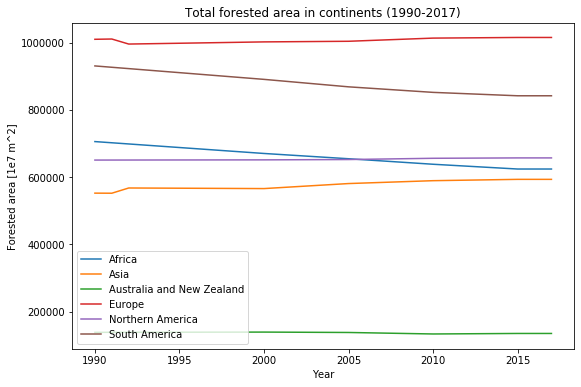

In [7]:
# forested areas in continents over yers
continents_forests_area = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                       land_use_all.Element.str.match('Area') & 
                                       land_use.Area.isin(CONTINENTS)]

plt.figure(figsize=(9, 6))
for continent in sorted(continents_forests_area.Area.unique().tolist()):
    plt.plot(continents_forests_area[continents_forests_area['Area'] == continent]['Year'],
             continents_forests_area[continents_forests_area['Area'] == continent]['Value'])
plt.title('Total forested area in continents (1990-2017)')
plt.legend(sorted(continents_forests_area.Area.unique().tolist()), loc='best')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

----
### Environment_LandUse_E_All_Data_cleared.csv
+ **Unit**: ['%']
+ **Item**: ['Arable land', 'Land under permanent crops', 'Cropland', 'Land under perm. meadows and pastures', 'Agriculture area actually irrigated', 'Land area equipped for irrigation', 'Agricultural land', 'Forest land', 'Primary Forest', 'Planted Forest', 'Other naturally regenerated forest', 'Agriculture area under organic agric.']
+ **Element**: ['Share in Agricultural land', 'Share in Land area', 'Share in Forest land']

In [8]:
# load ENV LansUse and select share of the forests in the each Area per yesr 
ENV_LAND_USE_FOREST = ['Forest land', 'Primary Forest', 'Planted Forest', 
                       'Other naturally regenerated forest']

env_land_use_all = pd.read_csv("data/faostat/Environment_LandUse_E_All_Data_cleared.csv", engine='python')

env_land_use = env_land_use_all[env_land_use_all.Item.isin(ENV_LAND_USE_FOREST) & env_land_use_all.Element.str.match("Share in Land area")]

env_land_use_yearly = env_land_use.groupby(["Area", "Year"]).Value.sum()
env_land_use_yearly = env_land_use_yearly.unstack("Year").fillna(method="backfill", axis=0)

In [9]:
env_land_use_all.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6621,Arable land,7208,Share in Agricultural land,1961,1961,%,20.29,Fc
1,2,Afghanistan,6621,Arable land,7208,Share in Agricultural land,1962,1962,%,20.39,Fc
2,2,Afghanistan,6621,Arable land,7208,Share in Agricultural land,1963,1963,%,20.50,Fc


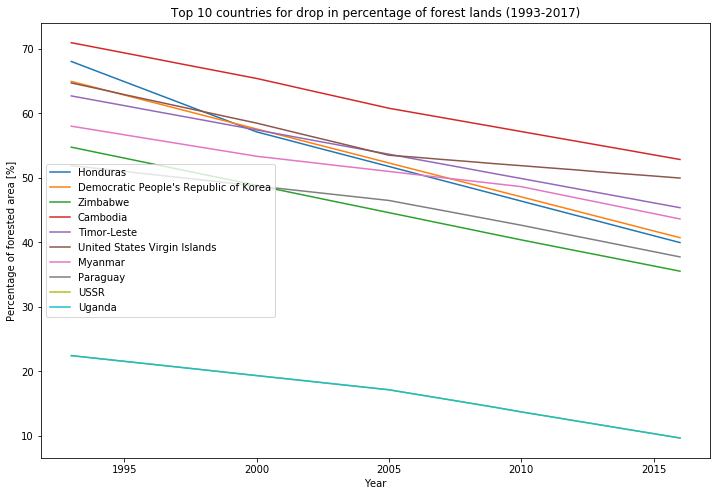

In [25]:
# top 10 deforested countries (criterion: percentage of country land lost)

# start from 1993 to avoid big drops in Serbia, Slovakia, Eritrea...
# env_land_use_yearly can be replaced by Inputs_LandUse_E_All_Data_cleared dataset,
# which already contains data for forested land (even if not percentage, but can be easily computed)

# column 3 -> 1993, column -1 -> 2017
env_land_use_diff_from_1993 = env_land_use_yearly[env_land_use_yearly.index.isin(FAOSTAT_countries)].iloc[:, 3] -\
                              env_land_use_yearly[env_land_use_yearly.index.isin(FAOSTAT_countries)].iloc[:, -1]
env_land_use_diff_from_1993 = env_land_use_diff_from_1993.sort_values(ascending=False)

forested_percentage_yearly = env_land_use_yearly.drop([1990, 1991, 1992], axis=1)

plt.figure(figsize=(12,8))
for country in env_land_use_diff_from_1993.index[0:10]:
    plt.plot(forested_percentage_yearly.columns.values, 
             forested_percentage_yearly.loc[forested_percentage_yearly.index == country].values[0])

plt.legend(env_land_use_diff_from_1993.index[0:10])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Percentage of forested area [%]')
plt.title('Top 10 countries for drop in percentage of forest lands (1993-2017)')
plt.show()

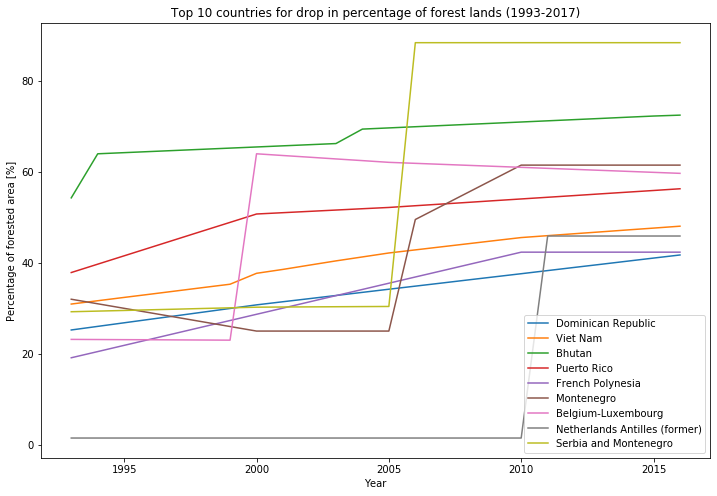

In [11]:
# top 10 countries for increasing percentage of forested areas
plt.figure(figsize=(12,8))
for country in env_land_use_diff_from_1993.index[-10:-1]:
    plt.plot(forested_percentage_yearly.columns.values, 
             forested_percentage_yearly.loc[forested_percentage_yearly.index == country].values[0])

plt.legend(env_land_use_diff_from_1993.index[-10:-1])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Percentage of forested area [%]')
plt.title('Top 10 countries for drop in percentage of forest lands (1993-2017)')
plt.show()

**Very messy data**

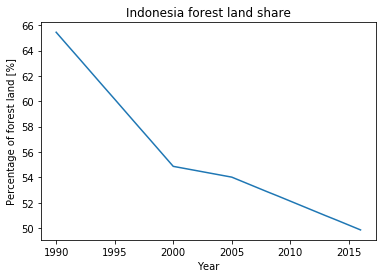

In [167]:
COUNTRY = 'Indonesia'
country_forest_share_yearly = env_land_use_all.loc[(env_land_use_all.Area == COUNTRY) &
                                                   (env_land_use_all.Item == 'Forest land')]

plt.plot(country_forest_share_yearly.Year, country_forest_share_yearly.Value)
plt.title(COUNTRY + ' forest land share')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Percentage of forest land [%]')
plt.show()

----
### Environment_LandCover_E_All_Data_cleared.csv
+ **Unit**: ['1000 ha']
+ **Item**: ['Artificial surfaces (including urban and associated areas)', 'Herbaceous crops', 'Woody crops', 'Multiple or layered crops', 'Grassland', 'Tree-covered areas', 'Mangroves', 'Shrub-covered areas', 'Shrubs and/or herbaceous vegetation:aquatic or regularly flooded', 'Sparsely natural vegetated areas', 'Terrestrial barren land', 'Permanent snow and glaciers', 'Inland water bodies', 'Coastal water bodies and intertidal areas']
+ **Element**: ['Area from MODIS', 'Area from CCI_LC']

In [3]:
env_land_cover_all = pd.read_csv("data/faostat/Environment_LandCover_E_All_Data_cleared.csv", engine='python')

In [13]:
env_land_cover_all.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2001,2001,1000 ha,88.7828,FC
1,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2002,2002,1000 ha,88.8043,FC
2,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2003,2003,1000 ha,88.8472,FC


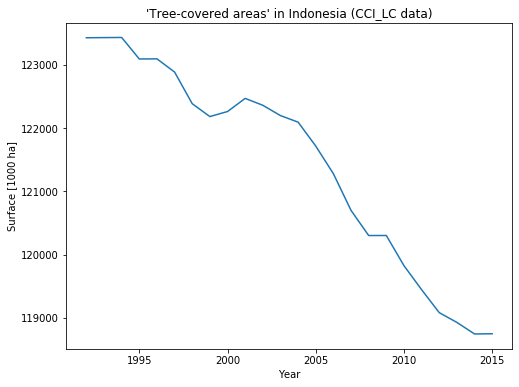

In [14]:
# 1) select COUNTRY and DATA_TYPE
# 2) choose if you want to plot all the valailable statistics (PLOT_UNIQUE = False)
#    or just one; in his case (PLOT_UNIQUE = True), select the statistic in UNIQUE_LAND_TYPE

COUNTRY = 'Indonesia'
DATA_TYPE = 'CCI_LC' # 'CCI_LC' or 'MODIS'
PLOT_UNIQUE = True
UNIQUE_LAND_TYPE = 'Tree-covered areas'

land_types = env_land_cover_all.Item.unique()
for LAND_TYPE in land_types:
    selected_item_yearly = env_land_cover_all.loc[(env_land_cover_all['Item'] == LAND_TYPE) &
                                                  (env_land_cover_all.Area.str.match(COUNTRY)) &
                                                  (env_land_cover_all.Element.str.match('Area from ' + DATA_TYPE)), 
                                                  ['Value', 'Year']]
    if PLOT_UNIQUE & (UNIQUE_LAND_TYPE != LAND_TYPE):
        continue
    if selected_item_yearly.Value.isnull().sum() == 0: # if the selected LAND_TYPE is registered every year
        plt.figure(figsize=(8, 6))
        plt.plot(selected_item_yearly['Year'], selected_item_yearly['Value'])
        plt.title("'" + LAND_TYPE + "' in " + COUNTRY + " (" + DATA_TYPE + " data)")
        plt.gca().set_xlabel('Year')
        plt.gca().set_ylabel('Surface [1000 ha]')
        plt.show()

In [97]:
# type of land use: comparison between different land types and deduction of 
# how the forested areas ('Tree-covered ares') transformed

def plot_land_type_differentials(country, data_type, land_types_number):
    """
    Plots the difference between the yearly surface change (increase or decrease) of different types of land,
    compared to a ground value (1992 for CCI_LC, 2001 for MODIS)
    :param str country:            should match with the 'Area' field
    :param str data_type:          CCI_LC or MODIS, come from different satellite images and different aggregation criteria
    :param int land_types_number:  number of categories plotted
    """
    
    # define the colors for each category (so that they are the same for every country plot)
    land_types_colors = ['royalblue',    # Artificial surfaces (including urban and associated areas)
                         'lime',         # Herbaceous crops
                         'red',          # Woody crops
                         'orange',       # Grassland
                         'green',        # Tree-covered areas
                         '.',            # Mangroves
                         'magenta',      # Shrub-covered areas
                         'darkgrey',     # Shrubs and/or herbaceous vegetation:aquatic or regularly flooded
                         'dodgerblue',   # Sparsely natural vegetated areas
                         'gold',         # Terrestrial barren land
                         '.',            # Permanent snow and glaciers
                         'aqua']         # Inland water bodies

    # create a DataFrame with year as only column. Years listed depend on the data_type
    country_land_types_yearly = pd.DataFrame(env_land_cover_all[env_land_cover_all.Element.str.match('Area from ' + data_type)].Year.unique(), 
                                             columns=['Year'])

    # fill the DataFrame columns: each column is a specific land type, each row is a year
    land_types = env_land_cover_all.Item.unique()
    for land_type in land_types:
        selected_item_yearly = env_land_cover_all.loc[(env_land_cover_all['Item'] == land_type) &
                                                      (env_land_cover_all.Area.str.match(country)) &
                                                      (env_land_cover_all.Element.str.match('Area from ' + data_type)), 
                                                      'Value']
        if selected_item_yearly.isnull().sum() == 0: # if the selected land_type is registered every year
            country_land_types_yearly[land_type] = selected_item_yearly.values

    # compute differences w.r.t. first year of measurement for every column
    starting_year = country_land_types_yearly.iloc[0, 0]
    country_land_types_year_diff = country_land_types_yearly - country_land_types_yearly.iloc[0, :]
    country_land_types_year_diff['Year'] = country_land_types_year_diff['Year'] + starting_year    # restore correct year after subtraction

    # set 'Year' as the new index
    country_land_types_year_diff.set_index('Year', inplace=True)

    plt.figure(figsize=(12, 8))
    selected_land_types = []
    top_n_land_types = country_land_types_year_diff.iloc[-1, :].abs().sort_values(ascending=False).index[0:land_types_number]
    for column_index, land_type in enumerate(country_land_types_year_diff.columns):
        
        # skip land types that doesn't change so much (cleaner plot!)
        if land_type not in top_n_land_types:
            continue
            
        # save current column index to print column name in legend
        selected_land_types.append(column_index)

        plt.plot(country_land_types_year_diff.index,
                 country_land_types_year_diff[land_type],
                 color=land_types_colors[column_index])

    plt.hlines(0, starting_year, 2015, linestyles='dashed')
    plt.title(country + " land use differentials (" + data_type + " data)")
    plt.legend(country_land_types_year_diff.columns[selected_land_types])
    plt.gca().set_xlabel('Year')
    plt.gca().set_ylabel('Differential surface w.r.t. ' + str(int(country_land_types_year_diff.index[0])) + ' value [1000 ha]')
    # plt.savefig(country + "_differentials_" + data_type)
    legend_offset = (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]) / 100
    plt.annotate('Reference level (' + str(starting_year) + ')', [2010, legend_offset])
    plt.show()

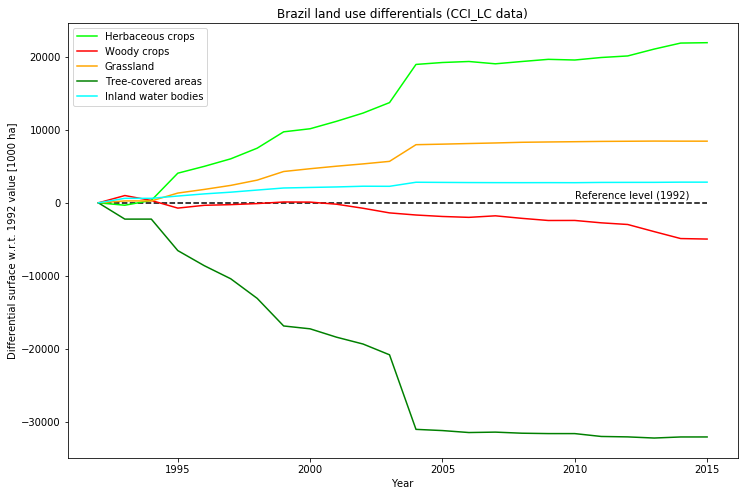

In [98]:
# Brazil
plot_land_type_differentials('Brazil', 'CCI_LC', 5)

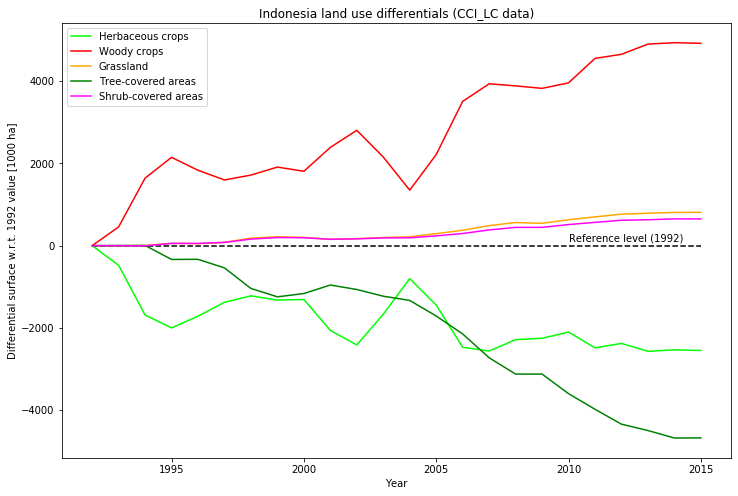

In [95]:
# Indonesia
plot_land_type_differentials('Indonesia', 'CCI_LC', 5)

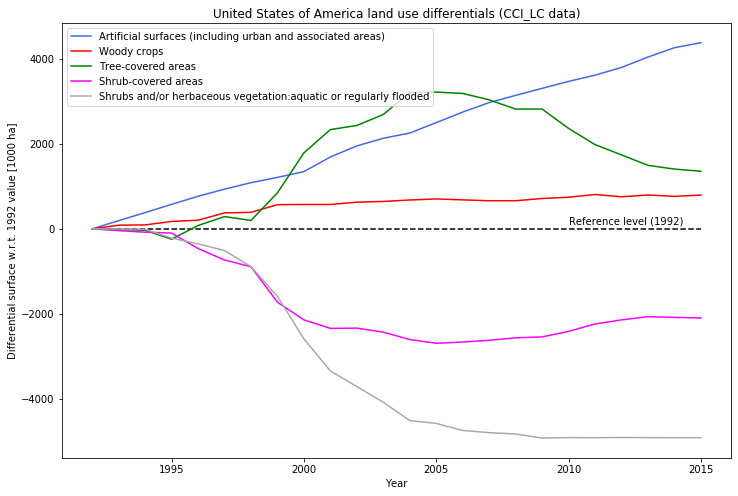

In [99]:
# United States of America
plot_land_type_differentials('United States of America', 'CCI_LC', 5)

> ### Explanation
>
> This dataset contains two types of measurements: CCI_LC and MODIS. The land distribution is inferred from satellite images and aggregated in different (not always perfectly consistent) ways. This plots represent **changes in different land types with respect to the "ground level" in 1992** (for CCI_LC, or 2001 for MODIS).
>
> Here we represent plots for Brazil and Indonesia (which are among the biggest deforested countries) and USA (which, instead, increased the forest land).
>
> + **Brazil**: big decrease in tree-covered areas, compensated by creation of **new grasslands and fields of herbaceous crops** (Brazil agriculture is mostly based on **sugar cane**)
> + **Indonesia**: in this case also herbaceous crops fields decrease to compensate the **increase of woody crops** (cultivated trees). This is linked to the main product of indonesian agriculture: **palm oil**.
> + **United States of America**: in this case tree-covered areas increased **subtracting land to shrubs** and other small vegetation lands.

----
### Forestry_E_All_Data_cleared.csv, Forestry_Trade_Flows_E_All_Data_cleared.csv

In [29]:
# load Forestry data
forest_all = pd.read_csv("data/faostat/Forestry_E_All_Data_cleared.csv", engine='python')
forest_trade = pd.read_csv("data/faostat/Forestry_Trade_Flows_E_All_Data_cleared.csv", engine='python')

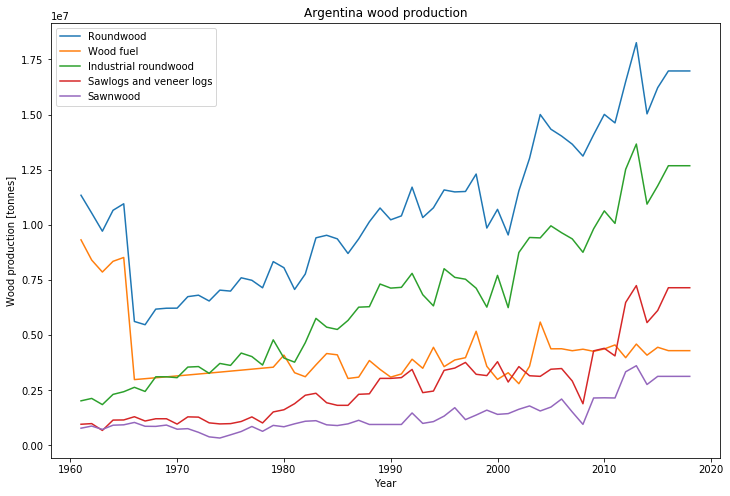

In [17]:
# Types of wood production.
# Plot only categories that:
# 1) existed since 1962
# 2) have a production value (in 2018) that is above the avarage of the values among all categories
# 3) are aggregated and do not distinguish between coniferous and non-coniferous
COUNTRY = 'Argentina'
UNIT = 'tonnes'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match("m3")]

# 1) for COUNTRY, find categories ('Item') that didn't change name between 1962 and 2018 (hopefully they are the most important)
longlasting_items = []
for wood_category in country_total_production.loc[(country_total_production.Year == 1962), 'Item'].unique():
    if wood_category in country_total_production.loc[(country_total_production.Year == 2018), 'Item'].unique():
        longlasting_items.append(wood_category)

# 2) among the longlasting_items, select those which have a 'Value' above the mean in 2018 (the most important ones)
country_significant_items = country_total_production.loc[(country_total_production.Year == 2018) & 
                                                         (country_total_production.Item.isin(longlasting_items))]\
                                                    .loc[(country_total_production.Value > country_total_production.Value.mean()),
                                                         'Item']

# 3) eliminate distinction between coniferous and non-coniferous (keep only aggregated values)
filtered_country_significant_items = []
for wood_type in country_significant_items:
    if 'coniferous' not in wood_type:
        filtered_country_significant_items.append(wood_type)
country_significant_items = filtered_country_significant_items

# Plot
plt.figure(figsize=(12, 8))
for ITEM in country_significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(country_significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

**But *'Roundwood'* seems to be the sum of *'Wood fuel'* and *'Industrial roundwood'*... ==> automatic selection of categories is not so good**

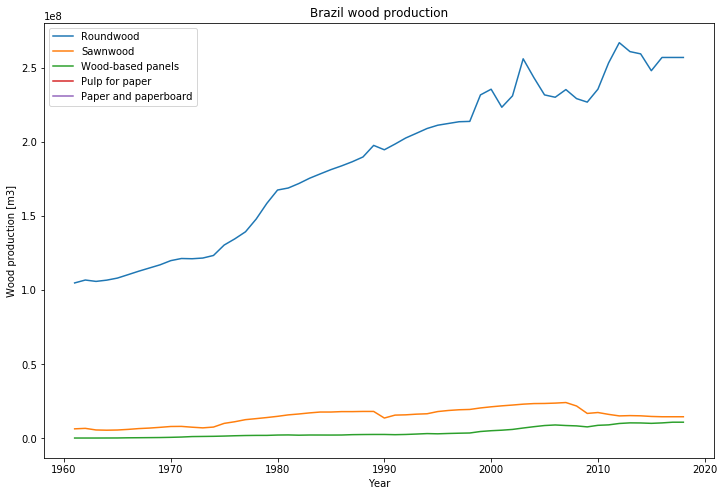

In [548]:
# Types of wood production.
# Plot only 5 main categories
COUNTRY = 'Brazil'
UNIT = 'm3'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match(UNIT)]

significant_items = ['Roundwood',
                     'Sawnwood',
                     'Wood-based panels',
                     'Pulp for paper',
                     'Paper and paperboard']

# Plot
plt.figure(figsize=(12, 8))
for ITEM in significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

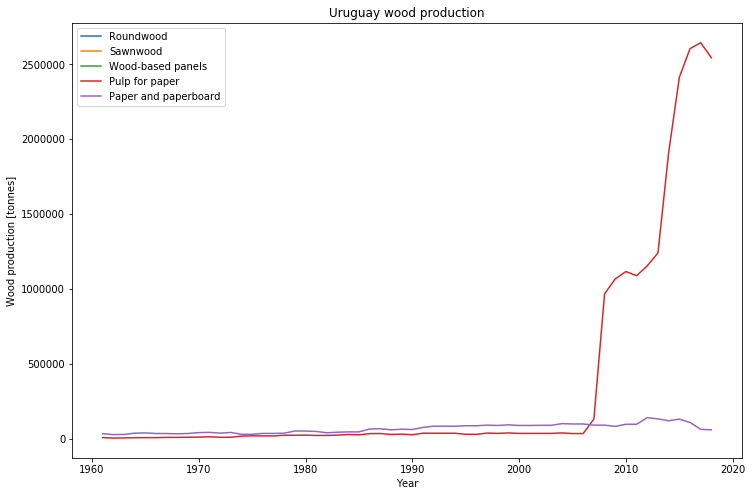

In [19]:
# Types of wood production.
# Plot only 5 main categories
COUNTRY = 'Uruguay'
UNIT = 'tonnes'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match(UNIT)]

significant_items = ['Roundwood',
                     'Sawnwood',
                     'Wood-based panels',
                     'Pulp for paper',
                     'Paper and paperboard']

# Plot
plt.figure(figsize=(12, 8))
for ITEM in significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

**In the two plots above the only change is in UNIT (4th row): *'Roundwood'*, *'Wood fuel'* and *'Industrial roundwood'* are measured in m^3, *Pulp for paper* and *Paper and paperboard* in tonnes.**

**These 5 categories are suggested in dataset description on FAO website**

----
### Environment_LivestockPatterns_E_All_Data_cleared.csv
+ **Unit**: ['LSU/ha', '% of total LSU', 'Livestock units (LSU)']
+ **Item**: ['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses', 'Mules', 'Sheep', 'Cattle and Buffaloes', 'Sheep and Goats', 'Equidae', 'Major livestock types', 'Buffaloes', 'Pigs']
+ **Element**: ['Livestock units per agricultural land area', 'Share in total livestock', 'Stocks']

In [102]:
env_livestock_all = pd.read_csv("data/faostat/Environment_LivestockPatterns_E_All_Data_cleared.csv", engine='python')

In [103]:
# BREEDS = ['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
#           'Mules', 'Sheep', 'Buffaloes', 'Pigs']
# BREEDS = ['Cattle and Buffaloes', 'Equidae', 'Sheep and Goats']

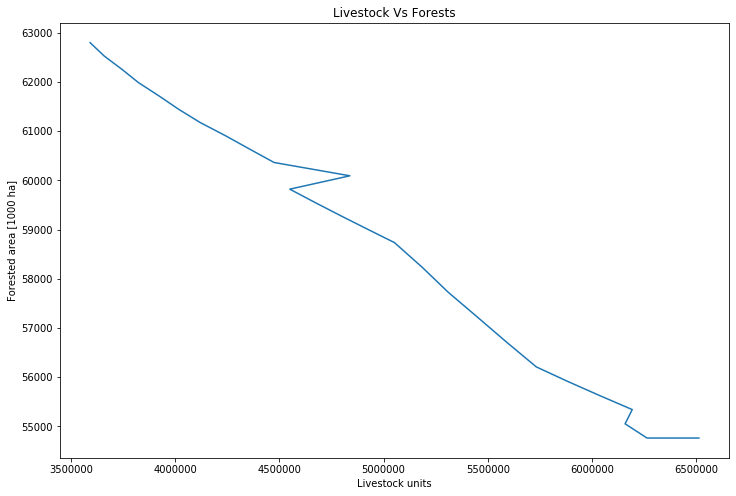

In [106]:
# correlation between forestry decrease and livestock breeding
COUNTRY = 'Bolivia (Plurinational State of)'
LIVESTOCK_BREEDS = ['Cattle']
LIVESTOCK_UNIT = 'Livestock units (LSU)' # 'LSU/ha', '% of total LSU', 'Livestock units (LSU)'
LAND_TYPE = 'Forestry'
LAND_UNIT = '1000 ha'

country_livestock_yearly = env_livestock_all.loc[(env_livestock_all.Unit == LIVESTOCK_UNIT) &
                                                 (env_livestock_all.Area == COUNTRY) &
                                                 (env_livestock_all.Item.isin(LIVESTOCK_BREEDS)) &
                                                 (env_livestock_all.Year >= 1990)]

country_land_use_yearly = land_use_all.loc[(land_use_all.Unit == LAND_UNIT) & 
                                           (land_use_all.Area == COUNTRY) & 
                                           (land_use_all.Item == LAND_TYPE)]

plt.figure(figsize=(12, 8))
plt.plot(country_livestock_yearly.Value, country_land_use_yearly.Value)
plt.gca().set_xlabel('Livestock units')
plt.gca().set_ylabel('Forested area [1000 ha]')
plt.title('Livestock Vs Forests')
plt.show()

----
### Production_Crops_E_All_Data_cleared.csv
+ **Unit**: ['ha', 'hg/ha', 'tonnes']
+ **Item**: ['Almonds:with shell', 'Anise:badian:fennel:coriander', 'Apples', ..., ..., **'Soybeans'**, ..., ..., ..., ..., 'Fruit:pome nes']
+ **Element**: [**'Area harvested'**, **'Yield'**, **'Production'**]

In [100]:
prod_crops_all = pd.read_csv("data/faostat/Production_Crops_E_All_Data_cleared.csv", engine='python')

In [316]:
# correlation between (low) yield and (high) deforestation
def yield_differences_in_top_10s(ITEM, YEAR):
    deforested_values = prod_crops_all.loc[(prod_crops_all.Area.isin(top_10_deforested_countries)) &
                                           (prod_crops_all.Item == ITEM) &
                                           (prod_crops_all.Year == YEAR) &
                                           (prod_crops_all.Element == 'Yield')]\
                                      .loc[:, ['Value', 'Area']]

    reforested_values = prod_crops_all.loc[(prod_crops_all.Area.isin(top_10_reforested_countries)) &
                                           (prod_crops_all.Item == ITEM) &
                                           (prod_crops_all.Year == YEAR) &
                                           (prod_crops_all.Element == 'Yield')]\
                                      .loc[:, ['Value', 'Area']]

    reforested_values['Deforested'] = 0
    reforested_values['Color'] = 'green'
    deforested_values['Deforested'] = 1
    deforested_values['Color'] = 'orange'
    all_values = pd.concat([deforested_values, reforested_values], axis=0)
    all_values = all_values.sort_values(by=['Value'])

    # print(ITEM + ' yield:\n' +
    #       str(deforested_values.Value.mean()) + ' (mean over ' + str(deforested_values.Value.count()) + ' countries in top 10 deforested)\n' + 
    #       str(reforested_values.Value.mean()) + ' (mean over ' + str(reforested_values.Value.count()) + ' countries in top 10 reforested)')

    plt.figure(figsize=(9, 6))
    for country in all_values.Area:
        plt.barh(country, all_values.loc[all_values.Area == country, 'Value'], color=all_values.loc[all_values.Area == country, 'Color'])
    # plt.legend(['reforested', 'deforested'])
    plt.title(ITEM + ' yield in top 10 reforested and deforested countries (' + str(YEAR) + ')')
    plt.gca().set_xlabel('Yield [hg/ha]')
    plt.show()

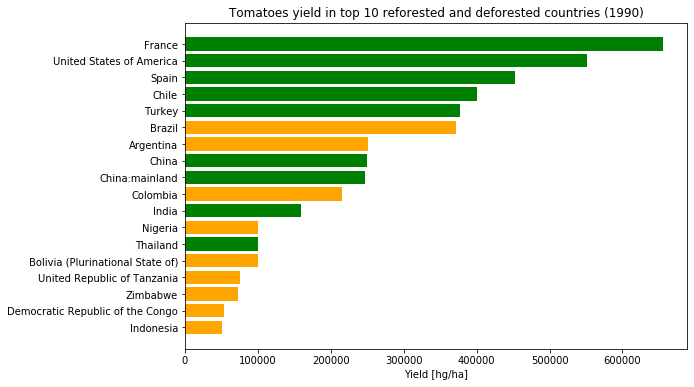

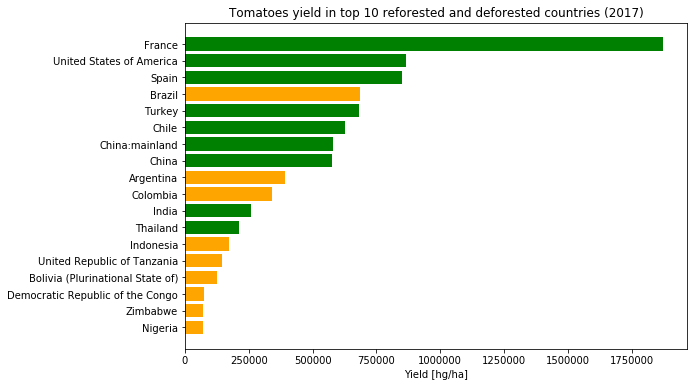

In [317]:
yield_differences_in_top_10s('Tomatoes', 1990)
yield_differences_in_top_10s('Tomatoes', 2017)

In [334]:
prod_crops_all.loc[(prod_crops_all.Element == 'Production')].Unit.unique()

array(['tonnes'], dtype=object)

In [101]:
countries_production_total = prod_crops_all.loc[(prod_crops_all.Element == 'Production')]\
                                           .groupby(['Area', 'Year'])\
                                           .sum()\
                                           .rename({'Value': 'Total Yearly Production'}, axis='columns')\
                                           .loc[:, 'Total Yearly Production']

countries_production_shares = prod_crops_all.loc[(prod_crops_all.Element == 'Production')]\
                                            .merge(countries_production_total, right_index=True, left_on=['Area', 'Year'])

countries_production_shares['Yearly Share'] = 100 * countries_production_shares['Value'] / countries_production_shares['Total Yearly Production']

# remove aggregated areas
countries_production_shares = countries_production_shares.loc[countries_production_shares['Area Code'] < 5000]

# select a single year
shares_single_year = countries_production_shares.loc[countries_production_shares.Year == 2015]

In [104]:
countries_production_shares.loc[(countries_production_shares.Area == 'Indonesia') &
                                (countries_production_shares.Year == 2015)]\
                           .sort_values('Yearly Share', ascending=False)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Total Yearly Production,Yearly Share
767840,101,Indonesia,254,Oil palm fruit,5510,Production,2015,2015,tonnes,148775321.0,Im,594080685.0,25.042949
772384,101,Indonesia,1717,Cereals:Total,5510,Production,2015,2015,tonnes,95010276.0,A,594080685.0,15.992824
769422,101,Indonesia,27,Rice:paddy,5510,Production,2015,2015,tonnes,75397841.0,NaN,594080685.0,12.691515
772213,101,Indonesia,1817,Cereals (Rice Milled Eqv),5510,Production,2015,2015,tonnes,69902795.0,A,594080685.0,11.766549
773725,101,Indonesia,1720,Roots and Tubers:Total,5510,Production,2015,2015,tonnes,25731400.0,A,594080685.0,4.331297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763564,101,Indonesia,265,Castor oil seed,5510,Production,2015,2015,tonnes,1500.0,NaN,594080685.0,0.000252
769143,101,Indonesia,211,Pulses:nes,5510,Production,2015,2015,tonnes,1357.0,Im,594080685.0,0.000228
769935,101,Indonesia,328,Seed cotton,5510,Production,2015,2015,tonnes,759.0,NaN,594080685.0,0.000128
767080,101,Indonesia,809,Manila fibre (abaca),5510,Production,2015,2015,tonnes,570.0,Im,594080685.0,0.000096


In [ ]:
# single country, single year, check share distribution
COUNTRY = 'Brazil'
YEAR = 2015
countries_production_shares.loc[(countries_production_shares.Area == COUNTRY) &
                                (countries_production_shares.Year == YEAR)]\
                           .sort_values(by=['Yearly Share'], ascending=False)\
                           .head(10)

In [ ]:
%%time
production_shares_matrix = pd.DataFrame(index=shares_single_year['Area'].unique(), columns=shares_single_year['Item'].unique())
row_names = production_shares_matrix.index
col_names = production_shares_matrix.columns
for row_index in range(0, production_shares_matrix.shape[0]):
    for col_index in range(0, production_shares_matrix.shape[1]):
        values = shares_single_year.loc[(shares_single_year.Area == row_names[row_index]) & 
                                        (shares_single_year.Item == col_names[col_index])]\
                                   .loc[:, 'Yearly Share']\
                                   .values
        if values.size == 0:
            production_shares_matrix.iloc[row_index, col_index] = 0
        else:
            if np.isnan(values[0]):
                production_shares_matrix.iloc[row_index, col_index] = 0
            else:
                production_shares_matrix.iloc[row_index, col_index] = values[0]
                
# export and save in pickle format
production_shares_matrix.to_pickle("./production_shares_matrix.pkl")

In [546]:
production_shares_matrix

,Almonds:with shell,Anise:badian:fennel:coriander,Apples,Apricots,Barley,Berries nes,Figs,Fruit:citrus nes,Fruit:fresh nes,Fruit:stone nes,...,Tallowtree seed,Vanilla,Agave fibres nes,Cassava leaves,Manila fibre (abaca),Kapok fibre,Kapok fruit,Gums:natural,Jojoba seed,Fruit:pome nes
Afghanistan,0.0976835,0.0725193,0.361521,0.353274,1.62363,0.0980381,0.0201281,0.012284,0.264083,0.204045,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,1.45978,0.0802803,0.11139,0,0.33304,0.0322235,0.158858,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0.157873,0,0.931925,0.605811,2.12726,0,0.287205,0.00113531,0.0681183,0.219485,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0.0862333,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0.640074,0.0936595,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0.143015,0.408972,0,...,0,0,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0.00278017,0,0.305405,0.0309791,0.362252,0,0.0885339,0.00429977,0.190192,0.0547746,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0.0465542,0,0,0,0.13138,0,...,0,0,0,0,0,0,0,0,0,0


In [484]:
# find top 10 re- and de-forester countries indices (rows) in the matrix
deforester_indices = []
reforester_indices = []
for i in range(0, production_shares_matrix.shape[0]):
    if production_shares_matrix.index[i] in top_10_deforested_countries.values:
        deforester_indices.append(i)
    elif production_shares_matrix.index[i] in top_10_reforested_countries.values:
        reforester_indices.append(i)

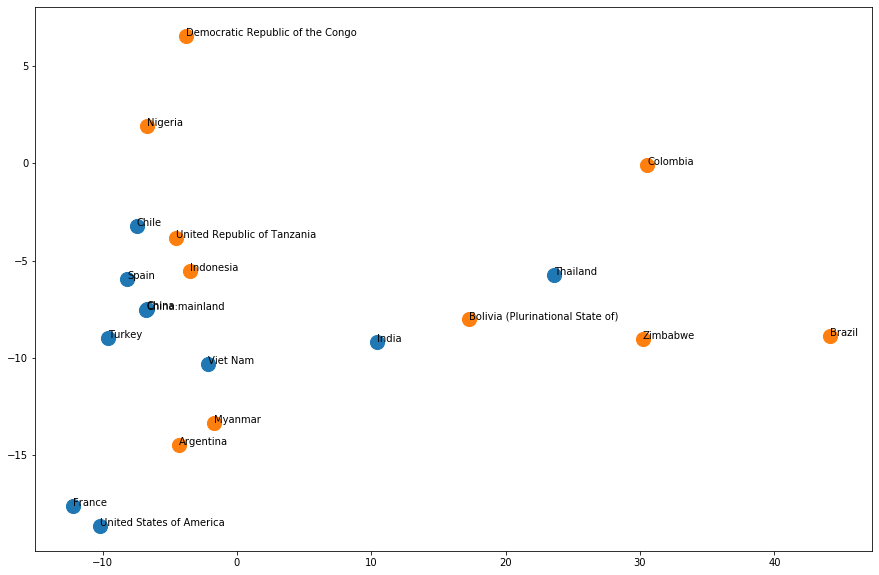

In [537]:
from sklearn.decomposition import PCA

# matrix rows are countries, columns products; values are shares (%) of total yearly production
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(production_shares_matrix.values)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

plt.figure(figsize=(15, 10))
plt.scatter(principalDf.PC1[reforester_indices], principalDf.PC2[reforester_indices], marker='o', s=200)
plt.scatter(principalDf.PC1[deforester_indices], principalDf.PC2[deforester_indices], marker='o', s=200)
# add country names to the plot
for i, country in enumerate(production_shares_matrix.index.values[reforester_indices]):
    plt.annotate(country, (principalDf.PC1[reforester_indices[i]], principalDf.PC2[reforester_indices[i]]))
for i, country in enumerate(production_shares_matrix.index.values[deforester_indices]):
    plt.annotate(country, (principalDf.PC1[deforester_indices[i]], principalDf.PC2[deforester_indices[i]]))
plt.show()

In [488]:
# first 10 singular values
print(pca.singular_values_)

[264.4201136  242.04806885 189.25995224 157.4486161  138.73085114
 103.56352932  98.67303145  85.99646508  72.74903897  66.14680869]


**The biggest two singular values are not so bigger than the others, a lot of variability can be lost**

In [532]:
# retry computing the reduced matrix (only 20 countries from the two top 10) before applying SVD
reduced_production_shares_matrix = production_shares_matrix.loc[production_shares_matrix.index.isin(top_10_deforested_countries.values.tolist() + 
                                                                                                    top_10_reforested_countries.values.tolist())]

In [533]:
# find top 10 re- and de-forester countries indices (rows) in the matrix
reduced_deforester_indices = []
reduced_reforester_indices = []
for i in range(0, reduced_production_shares_matrix.shape[0]):
    if reduced_production_shares_matrix.index[i] in top_10_deforested_countries.values:
        reduced_deforester_indices.append(i)
    elif reduced_production_shares_matrix.index[i] in top_10_reforested_countries.values:
        reduced_reforester_indices.append(i)

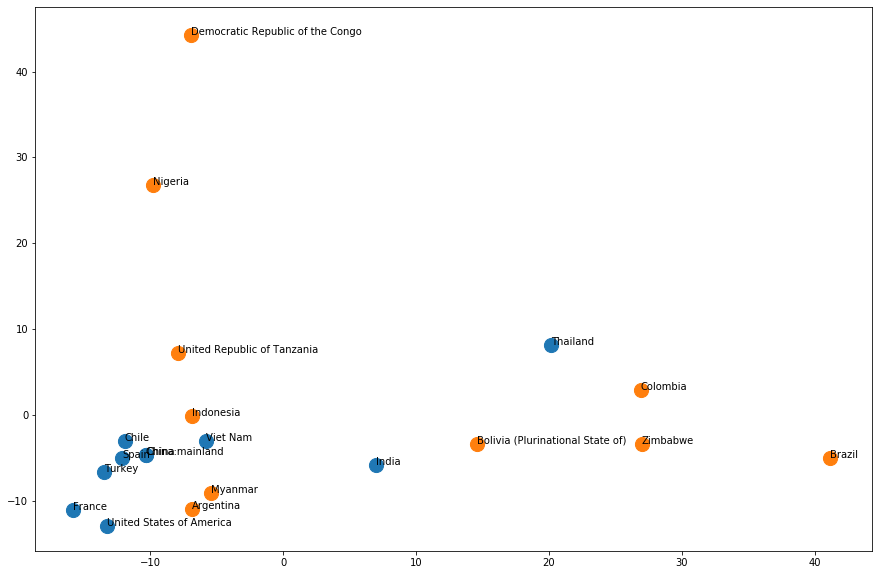

In [545]:
# matrix rows are countries, columns products; values are shares (%) of total yearly production
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(reduced_production_shares_matrix.values)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

plt.figure(figsize=(15, 10))
plt.scatter(principalDf.PC1[reduced_reforester_indices], principalDf.PC2[reduced_reforester_indices], marker='o', s=200)
plt.scatter(principalDf.PC1[reduced_deforester_indices], principalDf.PC2[reduced_deforester_indices], marker='o', s=200)
# add country names to the plot
for i, country in enumerate(reduced_production_shares_matrix.index.values[reduced_reforester_indices]):
    plt.annotate(country, (principalDf.PC1[reduced_reforester_indices[i]], principalDf.PC2[reduced_reforester_indices[i]]))
for i, country in enumerate(reduced_production_shares_matrix.index.values[reduced_deforester_indices]):
    plt.annotate(country, (principalDf.PC1[reduced_deforester_indices[i]], principalDf.PC2[reduced_deforester_indices[i]]))
plt.show()

In [543]:
# first 10 singular values
print(pca.singular_values_)

[72.7103547  59.36180494 36.38818324 30.07216008 24.19752362 18.66247835
 15.9690481  13.67630572 11.18038155  8.2808497 ]


In [544]:
print(pca.explained_variance_ratio_)

[0.41425953 0.27611766 0.10375302 0.07086132 0.04587983 0.02729095
 0.01998196 0.01465607 0.00979475 0.00537316]


**Now the difference between the biggest two singular valuesand the others is more pronounced (the third is about half the second)**

----
### Production_CropsProcessed_E_All_Data_cleared.csv

In [107]:
prod_crops_processed_all = pd.read_csv("data/faostat/Production_CropsProcessed_E_All_Data_cleared.csv", engine='python')

----
### Production_LivestockPrimary_E_All_Data_cleared.csv
+ **Unit**: ['1000 Head', '100mg/An', 'tonnes', '1000 No', **'Head'**, 'hg/An', '0.1g/An', 'hg', 'No']
+ **Item**: ['Eggs:hen:in shell', 'Eggs:hen:in shell (number)', 'Hides:cattle:fresh', 'Honey:natural', 'Meat indigenous:camel', **'Meat indigenous:cattle'**, ..., Snails:not sea', 'Hair:horse']
+ **Element**: ['Laying', **'Yield'**, 'Production', 'Producing Animals/Slaughtered', **'Yield/Carcass Weight'**, 'Milk Animals', 'Prod Popultn']

In [115]:
prod_livestock_primary_all = pd.read_csv("data/faostat/Production_LivestockPrimary_E_All_Data_cleared.csv", engine='python')

In [134]:
prod_livestock_primary_all.Element.unique()

array(['Laying', 'Yield', 'Production', 'Producing Animals/Slaughtered',
       'Yield/Carcass Weight', 'Milk Animals', 'Prod Popultn'],
      dtype=object)

In [331]:
prod_livestock_primary_all.loc[(prod_livestock_primary_all.Item == 'Meat:cattle') &
                               (prod_livestock_primary_all.Element == 'Yield/Carcass Weight') &
                               (prod_livestock_primary_all.Area == 'Brazil')]


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
97152,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1961,1961,hg/An,1917.0,Fc
97153,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1962,1962,hg/An,1940.0,Fc
97154,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1963,1963,hg/An,1926.0,Fc
97155,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1964,1964,hg/An,1910.0,Fc
97156,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1965,1965,hg/An,1909.0,Fc
97157,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1966,1966,hg/An,1909.0,Fc
97158,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1967,1967,hg/An,1928.0,Fc
97159,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1968,1968,hg/An,1941.0,Fc
97160,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1969,1969,hg/An,1927.0,Fc
97161,21,Brazil,867,Meat:cattle,5417,Yield/Carcass Weight,1970,1970,hg/An,1930.0,Fc


----
### Production_LivestockProcessed_E_All_Data_cleared.csv

In [114]:
prod_livestock_processed_all = pd.read_csv("data/faostat/Production_LivestockProcessed_E_All_Data_cleared.csv", engine='python')

----

In [101]:
top_10_deforested_countries

22                               Brazil
84                            Indonesia
128                             Nigeria
118                             Myanmar
184         United Republic of Tanzania
195                            Zimbabwe
20     Bolivia (Plurinational State of)
48     Democratic Republic of the Congo
8                             Argentina
39                             Colombia
Name: Area, dtype: object

In [100]:
top_10_reforested_countries

37                        China
38               China:mainland
185    United States of America
83                        India
190                    Viet Nam
165                       Spain
62                       France
36                        Chile
171                    Thailand
178                      Turkey
Name: Area, dtype: object

----
# Other analysis

Most common classes in Inputs_LandUse, Enviroment_LandUse, Environment_LandCover

Importance computed naively: just groupby Item and sum over all instances (no physical meaning of result)

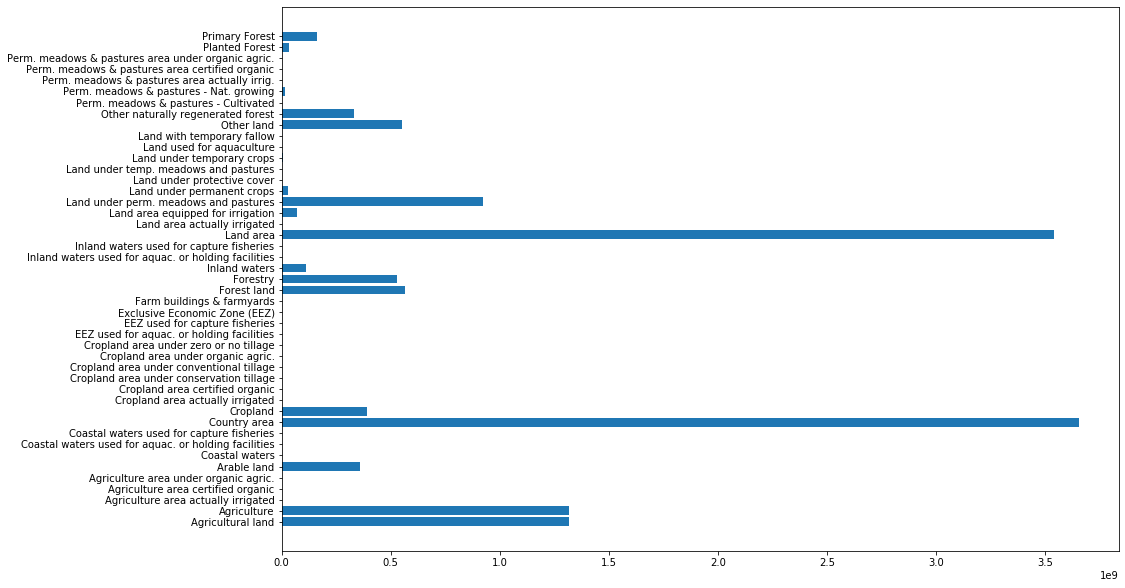

In [192]:
land_use_sum = land_use_all.groupby('Item').sum().loc[:, 'Value']
plt.figure(figsize=(15, 10))
plt.barh(land_use_sum.index, land_use_sum.values)
plt.show()

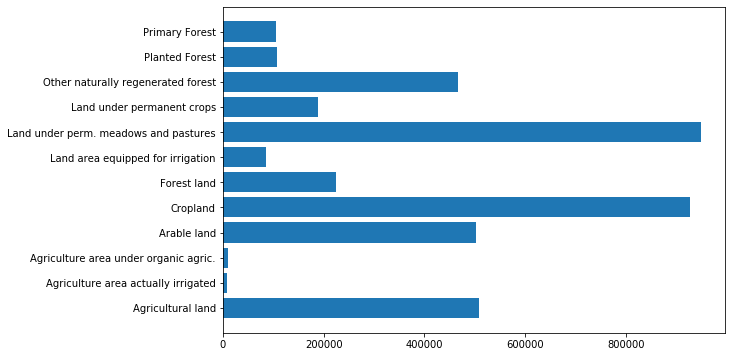

In [200]:
env_land_use_sum = env_land_use_all.groupby('Item').sum().loc[:, 'Value']
env_land_use_sum
plt.figure(figsize=(9, 6))
plt.barh(env_land_use_sum.index, env_land_use_sum.values)
plt.show()

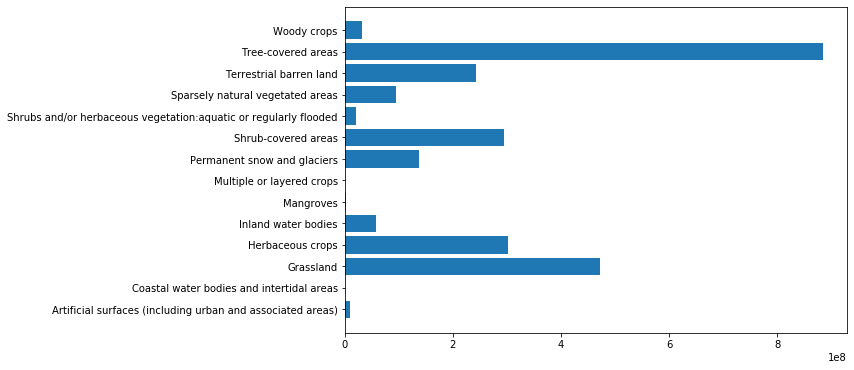

In [190]:
env_land_cover_sum = env_land_cover_all.groupby('Item').sum().loc[:, 'Value']
plt.figure(figsize=(9, 6))
plt.barh(env_land_cover_sum.index, env_land_cover_sum.values)
plt.show()